# Prelude

In [1]:
from pyiron import Project

In [2]:
import pyiron_potentialfit.spgfit.learn as plearn

In [6]:
train_pr = Project('W')['training/containers']

In [4]:
pr = Project('W').create_group('fits')

In [7]:
train_pr

{'groups': [], 'nodes': ['W4', 'W4VolMinAllMin', 'W4_Everything']}

# CLI

The command line below is largely equivalent to this notebook.

`python -m pyiron_potentialfit.spgfit.learn --level 8 12 16 --rmax 4 5 6 --containers W4_Everything`

# Python

## Load the Training Data

In [8]:
every = train_pr['W4_Everything']

## Fit Potential to a set of hyper parameters

In [10]:
plearn.fit?

Signature:
plearn.fit(
    fit_pr: pyiron_base.project.generic.Project,
    train: pyiron_potentialfit.atomistics.job.trainingcontainer.TrainingContainer,
    min_dist: Union[float, Iterable[float]],
    max_dist: Union[float, Iterable[float]],
    level: Union[int, Iterable[int]],
    iterations: int = 5000,
    energy_weight: float = None,
    force_weight: float = None,
    stress_weight: float = None,
    refit: bool = True,
    delete_existing_job=False,
) -> pyiron_base.project.generic.Project
Docstring:
Fit a potential to the given structures.

If rmin, rmax or level are iterables the function is broadcasted
over them.

Args:
    fit_pr (Project): project that contains the fitting jobs
    train (TrainingContainer): container that keeps all the structures
    rmin (float, Iterable[float]): lower cut off of the potential
    rmax (float, Iterable[float]): upper cut off of the potential
    level (int, Iterable[int]): level of the potential
    energy_weight (float): relative weig

In [12]:
plearn.fit(
    pr,
    every,
    # rmin, rmax and level can be given as scalar values or as lists. If lists one potential is fit for each
    rmin=2.2,
    rmax=[4, 5, 6],
    level=[8, 12, 16],
    # Whether to re-run a fit but using the results of the first fit as starting values; this sometimes produces a better potential, but not reliably
    refit=False,
)

The job MTP08_2d2_4_I_5000 was saved and received the ID: 21896553
Queue system id:  7161337
The job MTP12_2d2_4_I_5000 was saved and received the ID: 21896554
Queue system id:  7161338
The job MTP16_2d2_4_I_5000 was saved and received the ID: 21896555
Queue system id:  7161339
The job MTP08_2d2_5_I_5000 was saved and received the ID: 21896556
Queue system id:  7161340
The job MTP12_2d2_5_I_5000 was saved and received the ID: 21896557
Queue system id:  7161341
The job MTP16_2d2_5_I_5000 was saved and received the ID: 21896558
Queue system id:  7161342
The job MTP08_2d2_6_I_5000 was saved and received the ID: 21896559
Queue system id:  7161343
The job MTP12_2d2_6_I_5000 was saved and received the ID: 21896560
Queue system id:  7161344
The job MTP16_2d2_6_I_5000 was saved and received the ID: 21896561
Queue system id:  7161345


In [29]:
pr.get_jobs_status()

status
finished    10
Name: count, dtype: int64

## Analyze Training Error

In [30]:
from importlib import reload as re
re(plearn)

<module 'pyiron_potentialfit.spgfit.learn' from '/cmmc/ptmp/zora/software/pyiron_potentialfit/pyiron_potentialfit/spgfit/learn.py'>

In [31]:
df = plearn.analyze(pr)

Loading and filtering jobs:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
df

,job_id,level,rmin,rmax,restart,energy_spread,training,potential,error,quantity,metric
0,21896553,8,2.2,4,False,8.709893,W4_Everything,/cmmc/u/zora/pyiron/projects/2024/04_potentialfit_tests/W/fits/W4_Everything/MTP08_2d2_4_I_5000_hdf5/MTP08_2d2_4_I_5000/Trained.mtp_,0.269090,energy,RMSE
1,21896554,12,2.2,4,False,8.709893,W4_Everything,/cmmc/u/zora/pyiron/projects/2024/04_potentialfit_tests/W/fits/W4_Everything/MTP12_2d2_4_I_5000_hdf5/MTP12_2d2_4_I_5000/Trained.mtp_,0.232986,energy,RMSE
2,21896555,16,2.2,4,False,8.709893,W4_Everything,/cmmc/u/zora/pyiron/projects/2024/04_potentialfit_tests/W/fits/W4_Everything/MTP16_2d2_4_I_5000_hdf5/MTP16_2d2_4_I_5000/Trained.mtp_,0.207947,energy,RMSE
3,21896556,8,2.2,5,False,8.709893,W4_Everything,/cmmc/u/zora/pyiron/projects/2024/04_potentialfit_tests/W/fits/W4_Everything/MTP08_2d2_5_I_5000_hdf5/MTP08_2d2_5_I_5000/Trained.mtp_,0.109906,energy,RMSE
4,21896557,12,2.2,5,False,8.709893,W4_Everything,/cmmc/u/zora/pyiron/projects/2024/04_potentialfit_tests/W/fits/W4_Everything/MTP12_2d2_5_I_5000_hdf5/MTP12_2d2_5_I_5000/Trained.mtp_,0.051249,energy,RMSE
...,...,...,...,...,...,...,...,...,...,...,...
67,21896557,12,2.2,5,False,8.709893,W4_Everything,/cmmc/u/zora/pyiron/projects/2024/04_potentialfit_tests/W/fits/W4_Everything/MTP12_2d2_5_I_5000_hdf5/MTP12_2d2_5_I_5000/Trained.mtp_,2.396096,stress_shear,MAE
68,21896559,8,2.2,6,False,8.709893,W4_Everything,/cmmc/u/zora/pyiron/projects/2024/04_potentialfit_tests/W/fits/W4_Everything/MTP08_2d2_6_I_5000_hdf5/MTP08_2d2_6_I_5000/Trained.mtp_,2.951813,stress_shear,MAE
69,21896560,12,2.2,6,False,8.709893,W4_Everything,/cmmc/u/zora/pyiron/projects/2024/04_potentialfit_tests/W/fits/W4_Everything/MTP12_2d2_6_I_5000_hdf5/MTP12_2d2_6_I_5000/Trained.mtp_,2.933403,stress_shear,MAE
70,21896558,16,2.2,5,False,8.709893,W4_Everything,/cmmc/u/zora/pyiron/projects/2024/04_potentialfit_tests/W/fits/W4_Everything/MTP16_2d2_5_I_5000_hdf5/MTP16_2d2_5_I_5000/Trained.mtp_,1.693702,stress_shear,MAE


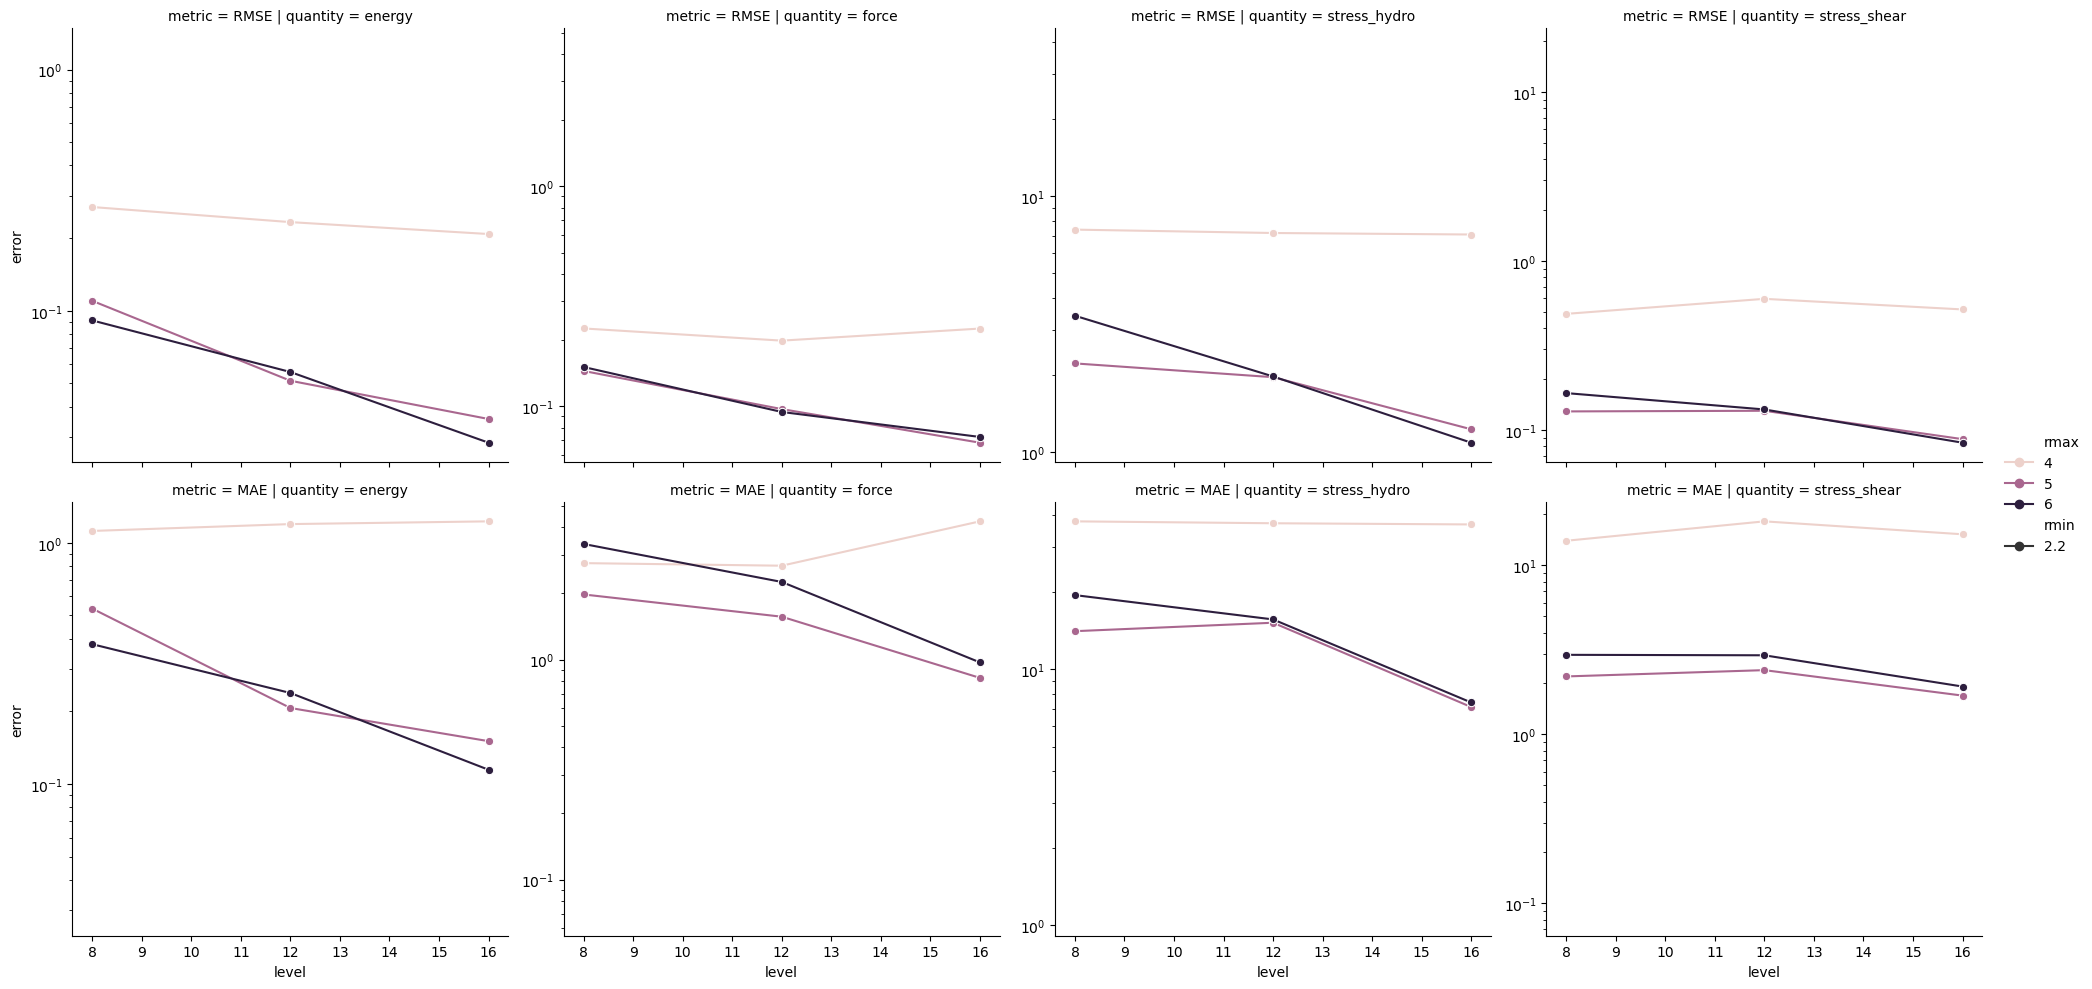

In [33]:
plearn.plot_error_vs_level(df)

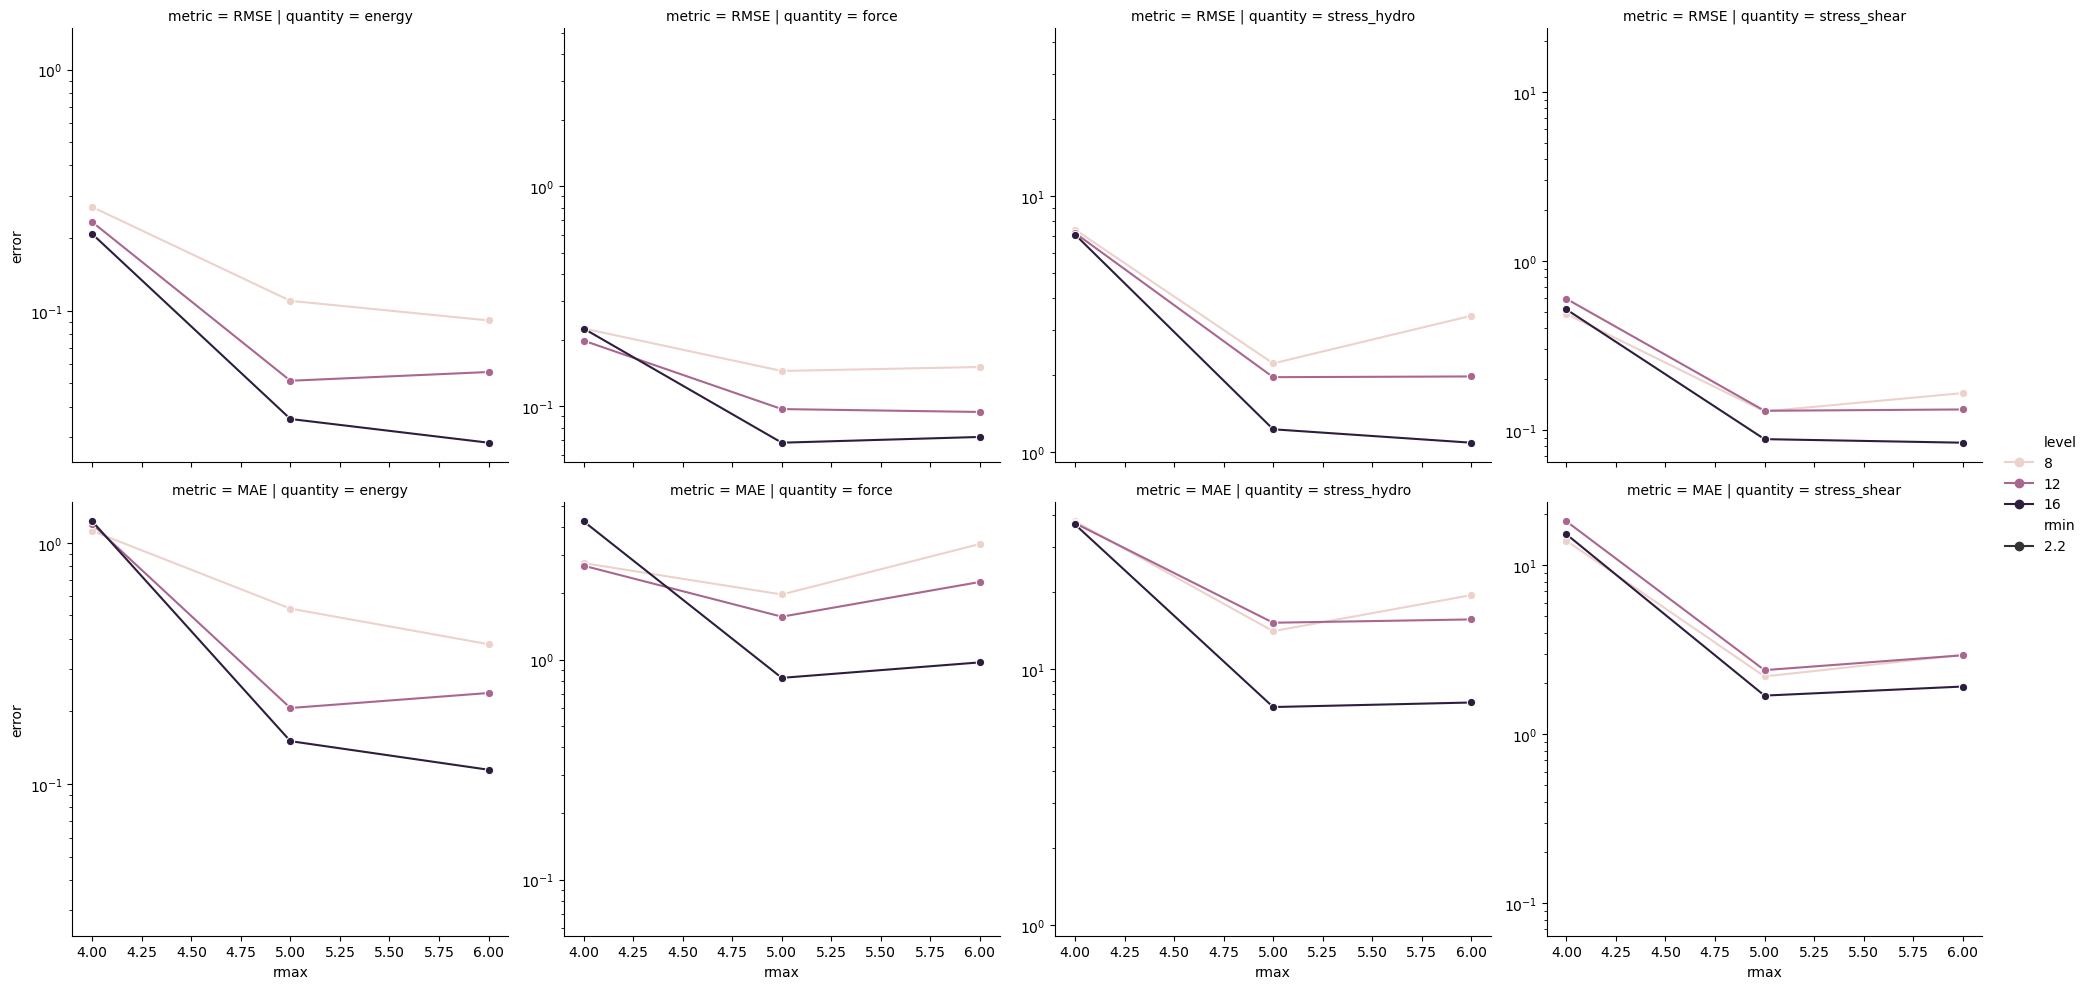

In [36]:
plearn.plot_error_vs_rmax(df)